In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b> Liner Regression related importent Librery </b>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<B> Load Data </B>

In [5]:
bos = pd.read_csv("BostonHousing.csv")
bos.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<b>Statistical Analysis</b>

In [6]:
bos.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
bos.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

<b>Strength of the predictor</b>

In [9]:
bos.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


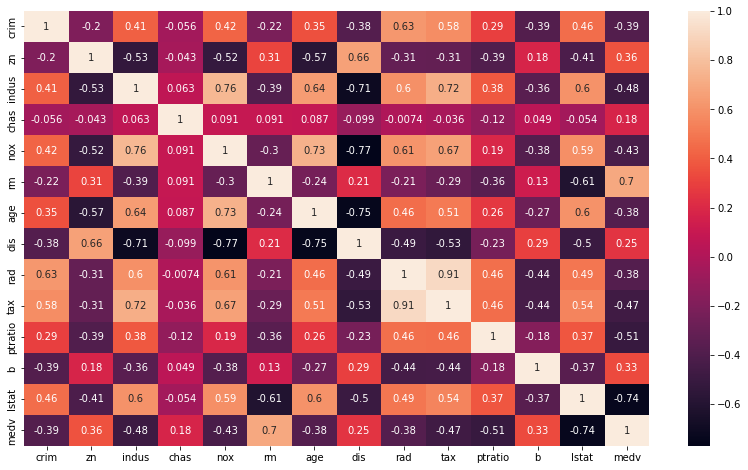

In [24]:
plt.figure(figsize=(14,8))
sns.heatmap(bos.corr(),annot=True)
plt.show()

<b> Need to seperate predictor/factor/independent/feature from Target/Dependendent/response variable

In [12]:
x = bos.iloc[:,0:13]
y = bos["medv"]

In [13]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [14]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

<b>STEP 1:</b> Split Train and Test Dataset 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=5)

<b>STEP 2:</b> Create a Linear Regrassion model by fitting train dataset which x_train and y_train

In [17]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)

<b>STEP 3:</b>Predict the value of dependent variable

In [18]:
y_pred = lm.predict(x_test)

In [20]:
y_pred

array([37.38997666, 31.56794193, 27.13373886,  6.55117625, 33.69310848,
        5.54919368, 27.10005629, 29.82980986, 26.44622421, 22.38873525,
       32.24739998, 21.74892356, 23.42369575, 33.57974607, 28.31450393,
       15.36502049,  0.17012738, 18.7085528 , 14.6046344 , 10.80263809,
        3.18552876, 19.39248482, 38.33235502, 24.40456217, 31.99950162,
       11.35200963, 24.922899  , 23.39214933, 22.75072363, 21.09584945,
       16.12295584,  7.53544865, 17.59797845, 22.82206974, 29.26790527,
       18.8053497 , 28.33669828,  8.60467923, 41.63227506, 34.1975156 ,
       20.11767808,  4.30987094, 29.61105614, 11.92148423, 27.22215387,
       30.94537934, -6.26468581, 19.96366597, 21.59383857, 13.6435966 ,
       20.49852424, 19.9376828 , 23.65383649, 13.51654696, 17.64433366,
       25.20135154, 35.31489968, 15.25337249, 28.51004736, 21.85251949,
       20.66385004, 26.03157156, 14.71628387, 32.34648274, 20.7126339 ,
       12.16905109, 19.60990611, 25.19479418, 21.78988729, 21.17

<b>STEP 4:</b> Find out the value of root mean squar(R2)

In [21]:
rms = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Sqaurd Error: {}".format(rms))

Root Mean Sqaurd Error: 5.540490745781336


<b>Step 6:</b> Top 5 importent field

In [23]:
slopes = pd.DataFrame({'Feature':x.columns,'Coef':lm.coef_,'Abs_coef':np.abs(lm.coef_)})
slopes.sort_values(by='Abs_coef',ascending= False).head()

,Feature,Coef,Abs_coef
4,nox,-12.936584,12.936584
5,rm,4.039523,4.039523
7,dis,-1.334986,1.334986
10,ptratio,-0.977288,0.977288
3,chas,0.786055,0.786055
